[  2.   8.   8.  15.  14.  18.  10.  12.   8.   5.] 

[2.3306346786085999, 5.0250480112914397, 8.999247409753119, 13.387078430904687, 16.542019240926731, 16.979285816423978, 14.477018489897542, 10.253303536036517, 6.0320541812110111, 2.9476158228298632] 

5.56381358516 

0.782654345572 

We failed to reject H0


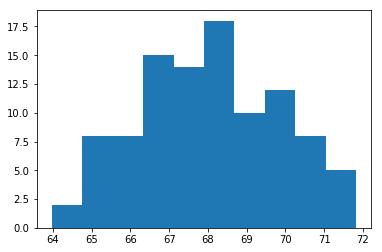

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, chisquare

ds = pd.read_csv("height-weight.csv")

sample = ds.height.sample(100)

observed_count, bins, patches = plt.hist(sample)

#area = [(norm.cdf(bins[i], np.mean(sample), np.std(sample, ddof = 1))-norm.cdf(bins[i-1], np.mean(sample), np.std(sample, ddof = 1))) for i in range(1, len(bins))]

z_scores = [(i-np.mean(sample))/np.std(sample, ddof = 1) for i in bins] #__
area = []                                                               #  !-> All this can be done in one step as shown above.
for i in range(1, len(bins)):                                           #  !
    area.append(norm.cdf(z_scores[i]) - norm.cdf(z_scores[i-1]))        #__!
    

expected_count = [i*100 for i in area]

chi2, p_value = chisquare(observed_count, expected_count)

print(observed_count, '\n')
print(expected_count, '\n')
print(chi2, '\n')
print(p_value, '\n')

if(p_value < 0.05):
    print("We reject H0")
    
else:
    print("We failed to reject H0")

In [15]:
chi2a, p_valuea = chisquare(observed_count, expected_count)
chi2b, p_valueb = chisquare(expected_count, observed_count)

print(chi2a)
print(chi2b)
print(p_valuea)
print(p_valueb)

6.31858833241
5.56381358516
0.707657552043
0.782654345572
